# Testowanie hipotez statystycznych w Pythonie
## Test t-Studenta – Porównanie średnich dwóch grup

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Wprowadzenie do testów statystycznych

d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


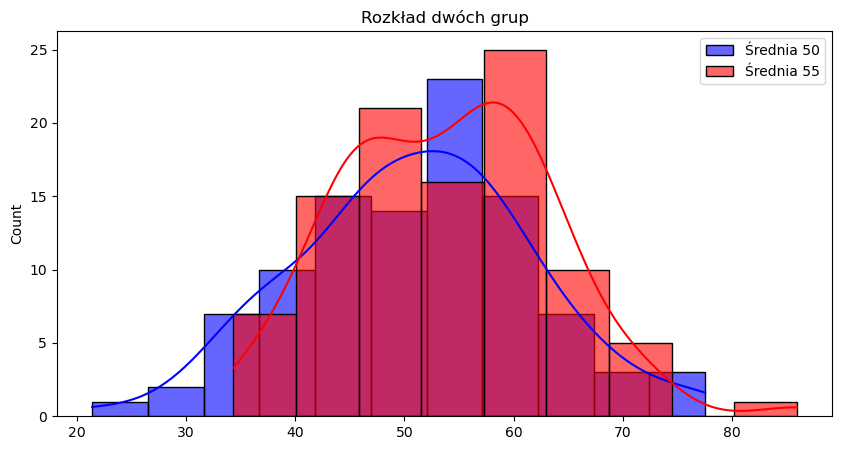

In [40]:
np.random.seed(21) # 21 42

data1 = np.random.normal(loc=50, scale=10, size=100)
data2 = np.random.normal(loc=55, scale=10, size=100)

plt.figure(figsize=(10, 5))
sns.histplot(data1, label='Średnia 50', kde=True, color='blue', alpha=0.6)
sns.histplot(data2, label='Średnia 55', kde=True, color='red', alpha=0.6)
plt.legend()
plt.title("Rozkład dwóch grup")
plt.show()

### Ćwiczenie 1: 
Sprawdź, jak zmieniają się histogramy po zwiększeniu liczby próbek do 500.

## Test t-Studenta dla dwóch prób niezależnych

d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


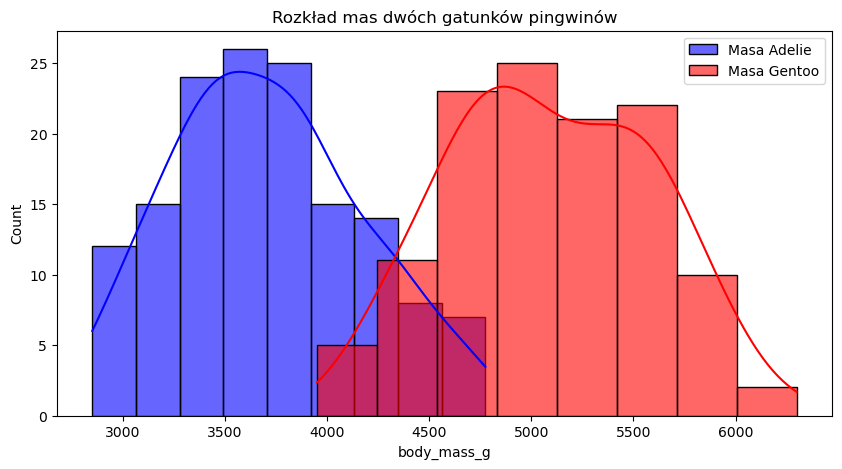

Test t-Studenta: t-stat = -23.4668, p-wartość = 0.0000
Odrzucamy hipotezę zerową: średnie się różnią.


In [74]:
# Wczytanie wbudowanego zbioru danych
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

# Wybór dwóch grup do porównania (gatunki Adelie i Gentoo)
adelie = penguins[penguins.species == "Adelie"]["body_mass_g"]
gentoo = penguins[penguins.species == "Gentoo"]["body_mass_g"]

plt.figure(figsize=(10, 5))
sns.histplot(adelie, label='Masa Adelie', kde=True, color='blue', alpha=0.6)
sns.histplot(gentoo, label='Masa Gentoo', kde=True, color='red', alpha=0.6)
plt.legend()
plt.title("Rozkład mas dwóch gatunków pingwinów")
plt.show()

# Test t-Studenta (czy średnie mas ciała się różnią?)
t_stat, p_value = stats.ttest_ind(adelie, gentoo)

print(f"Test t-Studenta: t-stat = {t_stat:.4f}, p-wartość = {p_value:.4f}")

if p_value < alpha:
    print("Odrzucamy hipotezę zerową: średnie się różnią.")
else:
    print("Nie ma podstaw podstaw statystycznych do odrzucenia hipotezy zerowej: średnie są podobne.")

In [73]:
# Sprawdzamy, czy średnie wartości obu grup są istotnie różne.
t_stat, p_value = stats.ttest_ind(data1, data2)
print(f"Test t-Studenta: t-stat = {t_stat:.4f}, p-wartość = {p_value:.4f}")

# Czy wynik jest statystycznie istotny? Przyjmijmy poziom istotności alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Odrzucamy hipotezę zerową: średnie się różnią.")
else:
    print("Nie ma podstaw podstaw statystycznych do odrzucenia hipotezy zerowej: średnie są podobne.")

Test t-Studenta: t-stat = -2.0461, p-wartość = 0.0421
Odrzucamy hipotezę zerową: średnie się różnią.


### Ćwiczenie 2: 
Zmień średnią jednej z grup i sprawdź, jak wpływa to na wynik testu.

## Test t-Studenta dla prób zależnych (test dla danych sparowanych)

d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


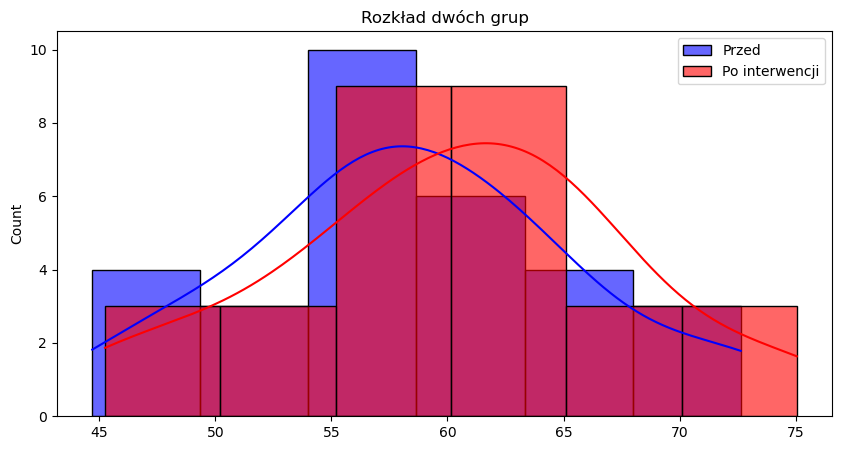

Test t-Studenta dla prób zależnych: t-stat = -5.1698, p-wartość = 0.0000
Odrzucamy hipotezę zerową: średnie się różnią.


In [63]:
# W przypadku pomiarów przed i po interwencji
np.random.seed(42) 
before = np.random.normal(60, 8, 30)
after = before + np.random.normal(2, 2, 30)

plt.figure(figsize=(10, 5))
sns.histplot(before, label='Przed', kde=True, color='blue', alpha=0.6)
sns.histplot(after, label='Po interwencji', kde=True, color='red', alpha=0.6)
plt.legend()
plt.title("Rozkład dwóch grup")
plt.show()

t_stat_paired, p_value_paired = stats.ttest_rel(before, after)
print(f"Test t-Studenta dla prób zależnych: t-stat = {t_stat_paired:.4f}, p-wartość = {p_value_paired:.4f}")

if p_value < alpha:
    print("Odrzucamy hipotezę zerową: średnie się różnią.")
else:
    print("Nie ma podstaw podstaw statystycznych do odrzucenia hipotezy zerowej: średnie są podobne.")


### Ćwiczenie 3: 
Zwiększ wariancję zmian po interwencji i sprawdź wynik testu.

## Test chi-kwadrat dla tabeli kontyngencji

In [114]:
# Wczytanie zbioru Titanic
titanic = sns.load_dataset("titanic").dropna()
# Tworzenie tabeli kontyngencji (ile osób przeżyło w każdej klasie)
contingency_table = pd.crosstab(titanic["class"], titanic["survived"])
display(contingency_table)
# Test chi-kwadrat
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Test chi-kwadrat: Statystyka chi2: {chi2_stat:.2f} Wartość p: {p_value:.4f}")

if p_val < alpha:
    print("Istnieją różnice między przeżywalnością między klasami.")
else:
    print("Nie znaleziono podstaw statystycznych dla różnicy między przeżywalnością dla klas.")

survived,0,1
class,,
First,51,106
Second,3,12
Third,5,5


Test chi-kwadrat: Statystyka chi2: 2.47 Wartość p: 0.2913
Istnieją różnice między przeżywalnością między klasami.


In [115]:
data = pd.DataFrame(np.array([[30, 10], [20, 40]]) )
data.columns = ['Produkt A', 'Produkt B']
data.index = ['Lubi', 'Nie lubi']
display(data)

chi2_stat, p_val, dof, expected = stats.chi2_contingency(pd.DataFrame(data))
print(f"Test chi-kwadrat: statystyka = {chi2_stat:.4f}, p-wartość = {p_val:.4f}")

if p_val < alpha:
    print("Istnieje zależność między preferencją a produktem.")
else:
    print("Nie znaleziono podstaw statystycznych dla zależności między preferencją a produktem.")

,Produkt A,Produkt B
Lubi,30,10
Nie lubi,20,40


Test chi-kwadrat: statystyka = 15.0417, p-wartość = 0.0001
Istnieje zależność między preferencją a produktem.


### Ćwiczenie 4
Zmień wartości w tabeli i sprawdź, kiedy test wykryje zależność.

## Test normalności (test Shapiro-Wilka)
Test sprawdzający `H0: czy zbiór jest z rozkładu normalnego`

In [119]:
shapiro_test = stats.shapiro(data1)
print(f"Test Shapiro-Wilka dla Grupy 1: Wartość statystyki = {shapiro_test.statistic:.4f}, p-wartość = {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue < alpha:
    print("Dane nie mają rozkładu normalnego.")
else:
    print("Nie znaleziono podstaw by odrzucić rozkład normalny w danych.")

Test Shapiro-Wilka dla Grupy 1: Wartość statystyki = 0.9943, p-wartość = 0.9531
Nie znaleziono podstaw by odrzucić rozkład normalny w danych.


### Ćwiczenie 5: 
Wygeneruj dane o rozkładzie suma `k` zmiennych z rozkładu wykładniczego (`np.random.exponential`) i sprawdź wynik testu dla `k` równego

a) 5,

b) 10,

c) 100,

d) 1000 


Test chi-kwadrat:
Statystyka chi2: 2.47
Wartość p: 0.2913


## Test U Manna-Whitneya (test nieparametryczny dla dwóch niezależnych grup)
Test sprawdzający równość rozkładów nie wymagający rozkładu normalnego wśród zmiennych (test nieparametryczny).

In [198]:
data1 = np.random.normal(0,1,size = [1000,1])
data2 = np.random.normal(1,10,size = [1000,1])

mannwhitney_test = stats.mannwhitneyu(data1, data2)
mannwhitney_test
print(f"Test U Manna-Whitneya: Wartość statystyki = {mannwhitney_test.statistic[0]:.4f}, p-wartość = {mannwhitney_test.pvalue[0]:.4f}")

if mannwhitney_test.pvalue < alpha:
    print("Odrzucamy hipotezę zerową: rozkłady są różne.")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej: rozkłady są podobne.")

Test U Manna-Whitneya: Wartość statystyki = 479271.0000, p-wartość = 0.1084
Nie ma podstaw do odrzucenia hipotezy zerowej: rozkłady są podobne.


### Ćwiczenie 6: 
Zmień liczbę próbek w grupach i parametry wariancji i zobacz, jak wpływa to na wynik testu.